In [66]:
import numpy as np 
import pandas as pd

In [67]:
train_data=pd.read_csv('train.csv')

In [68]:
print(train_data.columns)
print(train_data.shape)
print(train_data.head)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)
(42000, 785)
<bound method NDFrame.head of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0    

In [90]:
X = train_data.drop('label', axis = 1)
y = train_data['label']

In [91]:
from tensorflow.keras.utils import to_categorical
X = X.values
X = X.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y = to_categorical(y, 10)

C:\Users\hp\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


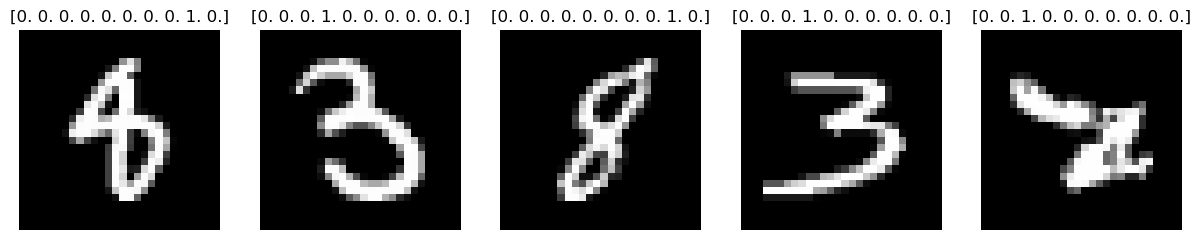

In [92]:
import matplotlib.pyplot as plt
import random
def plot_images(data, num_of_images):
    plt.figure(figsize=(15,10))
    for i in range(num_of_images):
        index = random.randint(0,len(train_data))
        plt.subplot(1,num_of_images,i+1)
        plt.imshow(data[index],cmap='gray') 
        plt.title(y[index])
        plt.axis('off')
    
    plt.show()
    
plot_images(X,5)

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [94]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=42)

In [95]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax')) 

In [96]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [98]:
model.fit(X_train, y_train, epochs=10, batch_size=64,validation_data=(X_val,y_val))


Epoch 1/10
420/420 [==============================] - 16s 36ms/step - loss: 0.3138 - accuracy: 0.9043 - val_loss: 0.1084 - val_accuracy: 0.9647
Epoch 2/10
420/420 [==============================] - 15s 36ms/step - loss: 0.0787 - accuracy: 0.9751 - val_loss: 0.0675 - val_accuracy: 0.9784
Epoch 3/10
420/420 [==============================] - 15s 37ms/step - loss: 0.0509 - accuracy: 0.9842 - val_loss: 0.0486 - val_accuracy: 0.9851
Epoch 4/10
420/420 [==============================] - 16s 37ms/step - loss: 0.0364 - accuracy: 0.9882 - val_loss: 0.0538 - val_accuracy: 0.9812
Epoch 5/10
420/420 [==============================] - 16s 37ms/step - loss: 0.0291 - accuracy: 0.9903 - val_loss: 0.0464 - val_accuracy: 0.9847
Epoch 6/10
420/420 [==============================] - 16s 37ms/step - loss: 0.0266 - accuracy: 0.9914 - val_loss: 0.0377 - val_accuracy: 0.9874
Epoch 7/10
420/420 [==============================] - 15s 36ms/step - loss: 0.0207 - accuracy: 0.9930 - val_loss: 0.0397 - val_accuracy:

In [108]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
loss_v, accuracy_v = model.evaluate(X_val, y_val, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

210/210 [==============================] - 2s 8ms/step - loss: 0.0423 - accuracy: 0.9876
Validation: accuracy = 0.987649  ;  loss_v = 0.042344
Test: accuracy = 0.988690  ;  loss = 0.037312


In [109]:
model.save("model.h5")